## Model training with k-fold cross-validation for JOB glaciers 
### Run from here to create training and test datasets and save to file

Model training with leave-one-glacier-out cross-validation for 3 JOB glaciers, using one JOB glacier as test.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# Specify filepaths and filenames.
loc = 'local'

if loc == 'cryocloud':
    filepath = '/home/jovyan/ML_MB_Norway_data/'
elif loc == 'local':
    filepath = 'Data/'

filename = '2023-06-27_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Load data.
data = pd.read_csv(filepath + filename)

data
data.columns

Index(['RGIID', 'GLIMSID', 'BREID', 'utm_zone', 'utm_east_approx',
       'utm_north_approx', 'altitude_approx', 'location_description',
       'location_id', 'stake_no',
       ...
       'tp_jan', 'tp_feb', 'tp_mar', 'tp_apr', 'tp_may', 'tp_jun', 'tp_jul',
       'tp_aug', 'tp_sep', 'altitude_climate'],
      dtype='object', length=301)

In [5]:
# Select glacier ids
# 2320 Tunsbergdalsbreen
# 2297 Nigardsbreen
# 2478 Austdalsbreen
# 2474 Vesldalsbreen

breid = [2320, 2297, 2478, 2474]

# Get data for glacier ids
glacier_data_all = data.loc[data['BREID'].isin(breid)]

glacier_data_all
# 1229 point measurements

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate
1930,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278,1322.716089
1931,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316,1322.716089
1932,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079,1322.716089
1933,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100000,...,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317,1322.716089
1934,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100002,...,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228,1322.716089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,RGI60-08.01286,G007335E61826N,2478,32,412500.0,6856200.0,1545.0,Midt på inste flata. Tårn,A70,A7013,...,0.001484,0.003576,0.007472,0.004013,0.002232,0.003431,0.005862,0.005143,0.004500,1346.780081
3155,RGI60-08.01286,G007335E61826N,2478,32,412500.0,6856200.0,1545.0,Midt på inste flata. Tårn,A70,A7015,...,0.005902,0.003536,0.005662,0.006070,0.002267,0.005416,0.005903,0.005157,0.002834,1346.780081
3156,RGI60-08.01286,G007335E61826N,2478,32,412500.0,6856200.0,1545.0,Midt på inste flata. Tårn,A70,A70T,...,0.001484,0.003576,0.007472,0.004013,0.002232,0.003431,0.005862,0.005143,0.004500,1346.780081
3157,RGI60-08.01286,G007335E61826N,2478,32,412500.0,6856200.0,1545.0,Midt på inste flata. Tårn,A70,A70T,...,0.008275,0.006257,0.006567,0.004509,0.004325,0.004612,0.006342,0.004245,0.003031,1346.780081


In [6]:
# Remove cells with nan in balance_netto.
glacier_data_all = glacier_data_all[glacier_data_all['balance_netto'].notna()]
glacier_data_all.reset_index(drop=True, inplace=True)
glacier_data_all
# 1191 point measurements
# 2320: 83
# 2297: 913
# 2478: 89
# 2474: 106

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate
0,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278,1322.716089
1,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316,1322.716089
2,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079,1322.716089
3,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100000,...,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317,1322.716089
4,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100002,...,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228,1322.716089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,RGI60-08.01286,G007335E61826N,2478,32,412500.0,6856200.0,1545.0,Midt på inste flata. Tårn,A70,A7013,...,0.001484,0.003576,0.007472,0.004013,0.002232,0.003431,0.005862,0.005143,0.004500,1346.780081
1187,RGI60-08.01286,G007335E61826N,2478,32,412500.0,6856200.0,1545.0,Midt på inste flata. Tårn,A70,A7015,...,0.005902,0.003536,0.005662,0.006070,0.002267,0.005416,0.005903,0.005157,0.002834,1346.780081
1188,RGI60-08.01286,G007335E61826N,2478,32,412500.0,6856200.0,1545.0,Midt på inste flata. Tårn,A70,A70T,...,0.001484,0.003576,0.007472,0.004013,0.002232,0.003431,0.005862,0.005143,0.004500,1346.780081
1189,RGI60-08.01286,G007335E61826N,2478,32,412500.0,6856200.0,1545.0,Midt på inste flata. Tårn,A70,A70T,...,0.008275,0.006257,0.006567,0.004509,0.004325,0.004612,0.006342,0.004245,0.003031,1346.780081


In [7]:
# Test glacier is 2478 Austdalsbreen
df_test = glacier_data_all.loc[glacier_data_all['BREID']==2474]

# Training glaciers are 2320, 2297, 2474
df_train_all = glacier_data_all.loc[glacier_data_all['BREID']!=2474]

df_test.reset_index(drop=True, inplace=True)
df_train_all.reset_index(drop=True, inplace=True)


In [43]:
# Save test and training+validation dataset
#df_test.to_csv(filepath + 'train_test/data_test_job.csv')
#df_train_all.to_csv(filepath + 'train_test/data_train_all_job.csv')

In [9]:
idcs = glacier_data_all.index.values

glacier_train, glacier_test = train_test_split(idcs, test_size=0.30, random_state=0)
                                               #train_size=0.7,
                                               #test_size=0.3)

df_train_all_rdsplit = glacier_data_all.loc[glacier_train]
df_test_rdsplit = glacier_data_all.loc[glacier_test]

In [11]:
df_train_all_rdsplit.reset_index(drop=True, inplace=True)
df_test_rdsplit.reset_index(drop=True, inplace=True)

In [12]:
# Save test and training+validation dataset
df_test_rdsplit.to_csv(filepath + 'train_test/data_test_job_rdsplit.csv')
df_train_all_rdsplit.to_csv(filepath + 'train_test/data_train_all_job_rdsplit.csv')

### Run from here to train model with only precipitation and temperature



In [59]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneGroupOut

from plotting_functions import plot_prediction

In [60]:
# Load training and validation datasets
filepath = 'Data/'

df_train = pd.read_csv(filepath + 'train_test/data_train_all_job.csv', index_col=0)
df_test = pd.read_csv(filepath + 'train_test/data_test_job.csv', index_col=0)

In [61]:
# Make year column
df_train['year']=pd.to_datetime(df_train['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
df_train['year'] = df_train.year.dt.year.astype('Int64')

df_test['year']=pd.to_datetime(df_test['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
df_test['year'] = df_test.year.dt.year.astype('Int64')

In [62]:
base_cols = ['BREID','altitude','aspect','slope','slope_factor','altitude_climate','year']
temp_cols = ['t2m_oct','t2m_nov','t2m_des','t2m_jan','t2m_feb','t2m_mar','t2m_apr','t2m_may','t2m_jun','t2m_jul','t2m_aug','t2m_sep']
prec_cols = ['tp_oct','tp_nov','tp_des','tp_jan','tp_feb','tp_mar','tp_apr','tp_may','tp_jun','tp_jul','tp_aug','tp_sep']

cols = [y for x in [base_cols, temp_cols, prec_cols] for y in x]

df_train_X = df_train[cols]
df_train_y = df_train[['BREID','balance_netto']]
df_test_X = df_test[cols]
df_test_y = df_test[['BREID','balance_netto']]


array([[<Axes: title={'center': '2297'}>,
        <Axes: title={'center': '2320'}>],
       [<Axes: title={'center': '2478'}>, <Axes: >]], dtype=object)

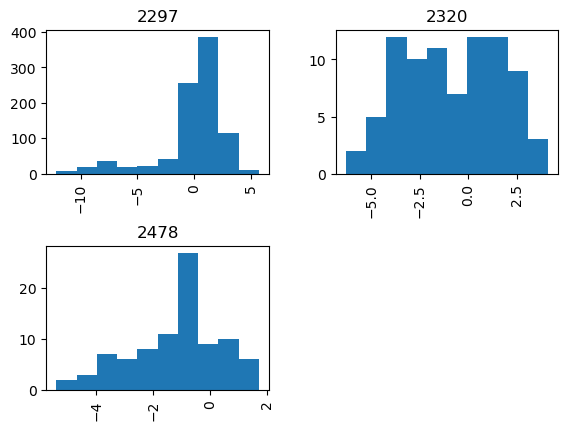

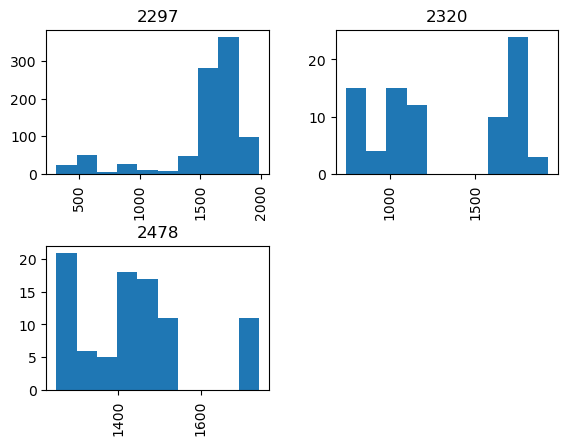

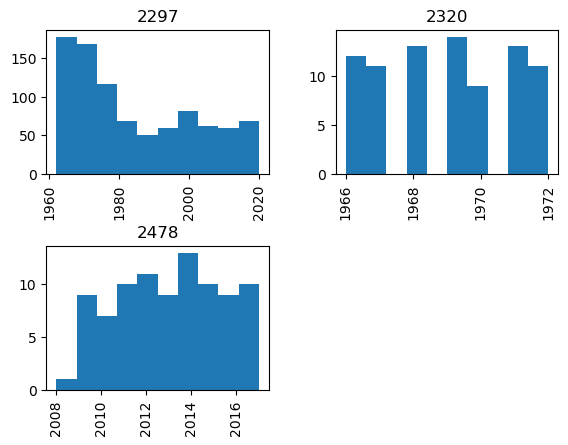

In [63]:
df_train_y['balance_netto'].hist(by=df_train_y['BREID'])
df_train_X['altitude'].hist(by=df_train_X['BREID'])
df_train_X['year'].hist(by=df_train_X['BREID'])

<Axes: title={'center': '2474'}>

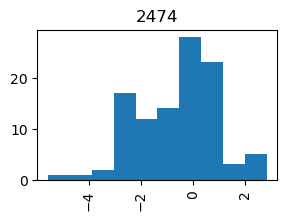

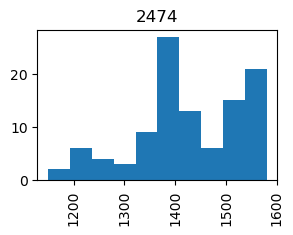

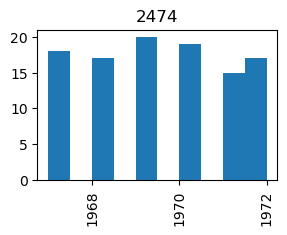

In [64]:
fig, ax = plt.subplots(figsize=(3,2))
df_test_y['balance_netto'].hist(by=df_test_y['BREID'], ax=ax)
fig, ax = plt.subplots(figsize=(3,2))
df_test_X['altitude'].hist(by=df_test_X['BREID'], ax=ax)
fig, ax = plt.subplots(figsize=(3,2))
df_test_X['year'].hist(by=df_test_X['BREID'], ax=ax)

In [65]:
# df_test_X and df_test_y now only contain BREID 2478

df_test_X = df_test_X.drop(['BREID','year'], axis=1)
df_test_y = df_test_y.drop('BREID', axis=1)

X_test, y_test = df_test_X.values, df_test_y.values

In [66]:
df_train_X = df_train_X.drop(['year'], axis=1)
df_train_X_clean = df_train_X.drop(['BREID'], axis=1)
df_train_y_clean = df_train_y.drop('BREID', axis=1)

X_train, y_train = df_train_X_clean.values, df_train_y_clean.values

In [67]:
# Split training dataset according to glacier id (3 folds with leave one glacier out)
gp = df_train_X.BREID.values
logo = LeaveOneGroupOut()
#cv=logo.split(X_train, y_train, groups=gp)

In [14]:
xgb_model = xgb.XGBRegressor()

# Define parameter ranges.
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
          'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400], # number of trees (too many = overfitting, too few = underfitting)
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf = GridSearchCV(xgb_model, 
                   params, 
                   cv=logo.split(X_train, y_train, groups=gp), # Int or iterator
                   verbose=1, # Controls number of messages
                   n_jobs=4, # No of parallell jobs
                   scoring='neg_mean_squared_error', # Can use multiple metrics
                   refit=True, # Default True. For multiple metric evaluation, refit must be str denoting scorer to be used to find the best parameters for refitting the estimator.
                   return_train_score=False) # Default False. If False, cv_results_ will not include training scores.

# Fit model to folds
clf.fit(X_train, y_train)

# Get results of grid search
results = clf.cv_results_
print('Cross validation test score: ', clf.best_score_)
print('Cross validation test score: ', results['mean_test_score'].max())
#print('Cross validation train score: ', results['mean_train_score'].max())
print('Grid search best hyperparameters: ', clf.best_params_)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits
Cross validation test score:  -1.9426518312412873
Cross validation test score:  -1.9426518312412873
Grid search best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400}


In [15]:
# Get best hyperparameters from grid search.
params_best = clf.best_params_

# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                             n_estimators = params_best['n_estimators'],
                             max_depth = params_best['max_depth'])



In [16]:
from sklearn.model_selection import cross_val_score

cvl = cross_val_score(xgb_model, X_train, y_train, cv=logo.split(X_train, y_train, groups=gp), scoring='neg_mean_squared_error')

print('Cross validation scores: ', cvl)
print('Mean score: ', cvl.mean())
print('Standard deviation: ', cvl.std())

Cross validation scores:  [-2.93311335 -1.66562553 -1.22921661]
Mean score:  -1.9426518312412873
Standard deviation:  0.7226680653330178


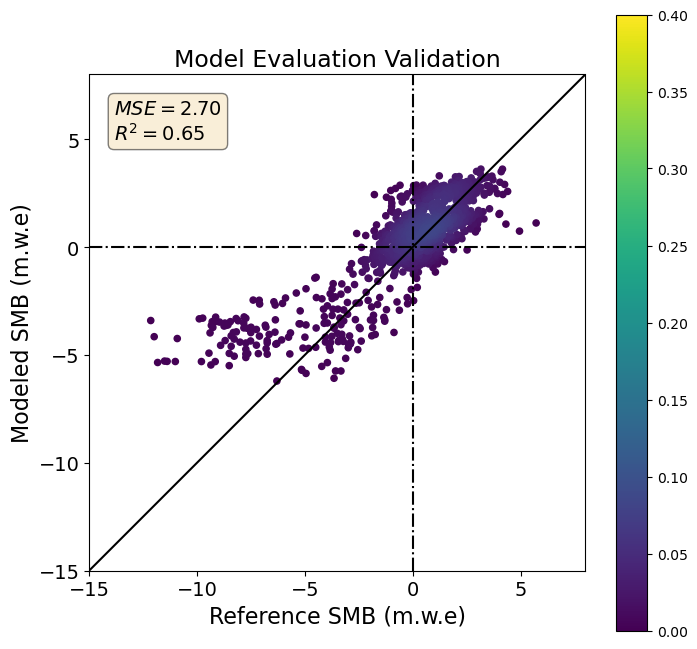

In [18]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in logo.split(X_train, y_train, groups=gp):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    xgb_model.fit(X_train1, y_train1)
    y_pred = xgb_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

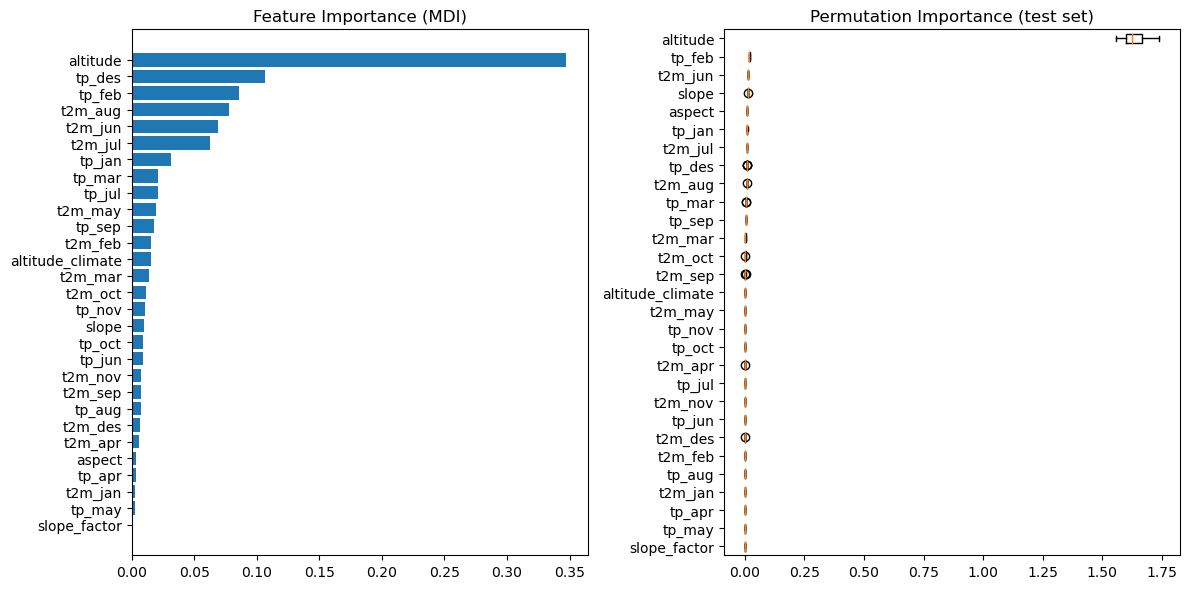

In [19]:
from sklearn.inspection import permutation_importance

xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X_clean.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X_clean.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

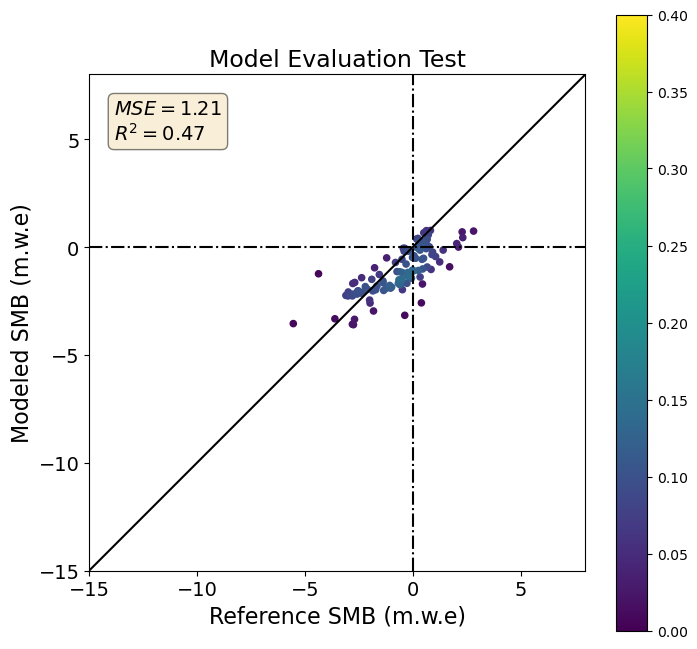

In [68]:
# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                             n_estimators = params_best['n_estimators'],
                             max_depth = params_best['max_depth'])
# Predict on hold-out test set and plot predictions
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

### Run from here to train model with all climate variables

In [69]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneGroupOut

from plotting_functions import plot_prediction

In [70]:
# Load training and validation datasets
filepath = 'Data/'

df_train = pd.read_csv(filepath + 'train_test/data_train_all_job.csv', index_col=0)
df_test = pd.read_csv(filepath + 'train_test/data_test_job.csv', index_col=0)

In [71]:
# Select columns to drop

cols = ['RGIID','GLIMSID','utm_zone','utm_east_approx','utm_north_approx','altitude_approx',
        'location_description','location_id','stake_no','utm_east','utm_north',
        'balance_winter','balance_summer','dt_prev_year_min_date','dt_curr_year_max_date',
        'dt_curr_year_min_date','stake_remark','flag_correction','approx_loc','approx_altitude',
        'diff_north','diff_east','diff_altitude','diff_netto','lat','lon','lat_approx','lon_approx',
        'topo','dis_from_border']

snow_depth_m = ['sde_oct','sde_nov','sde_des','sde_jan','sde_feb','sde_mar','sde_apr','sde_may','sde_jun','sde_jul','sde_aug','sde_sep']
snow_density = ['rsn_oct','rsn_nov','rsn_des','rsn_jan','rsn_feb','rsn_mar','rsn_apr','rsn_may','rsn_jun','rsn_jul','rsn_aug','rsn_sep']
evaporation = ['es_oct','es_nov','es_des','es_jan','es_feb','es_mar','es_apr','es_may','es_jun','es_jul','es_aug','es_sep']

drop_cols = [y for x in [cols, snow_depth_m, snow_density, evaporation] for y in x]

df_train_X = df_train.drop(drop_cols, axis=1)
df_train_y = df_train[['BREID','balance_netto']]

df_test_X = df_test.drop(drop_cols, axis=1)
df_test_y = df_test[['BREID','balance_netto']]


In [72]:
df_test_X = df_test_X.drop(['BREID','balance_netto'], axis=1)
df_test_y = df_test_y.drop('BREID', axis=1)

X_test, y_test = df_test_X.values, df_test_y.values

In [73]:
df_train_X_clean = df_train_X.drop(['BREID','balance_netto'], axis=1)
df_train_y_clean = df_train_y.drop('BREID', axis=1)

X_train, y_train = df_train_X_clean.values, df_train_y_clean.values

In [74]:
# Split training dataset according to glacier id (3 folds with leave one glacier out)
gp = df_train_X.BREID.values
logo = LeaveOneGroupOut()
#cv=logo.split(X_train, y_train, groups=gp)

In [26]:
xgb_model = xgb.XGBRegressor()

# Define parameter ranges.
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
          'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400], # number of trees (too many = overfitting, too few = underfitting)
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf = GridSearchCV(xgb_model, 
                   params, 
                   cv=logo.split(X_train, y_train, groups=gp), # Int or iterator
                   verbose=1, # Controls number of messages
                   n_jobs=4, # No of parallell jobs
                   scoring='neg_mean_squared_error', # Can use multiple metrics
                   refit=True, # Default True. For multiple metric evaluation, refit must be str denoting scorer to be used to find the best parameters for refitting the estimator.
                   return_train_score=False) # Default False. If False, cv_results_ will not include training scores.

# Fit model to folds
clf.fit(X_train, y_train)

# Get results of grid search
results = clf.cv_results_
print('Cross validation test score: ', clf.best_score_)
print('Cross validation test score: ', results['mean_test_score'].max())
#print('Cross validation train score: ', results['mean_train_score'].max())
print('Grid search best hyperparameters: ', clf.best_params_)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits
Cross validation test score:  -1.6992449689412814
Cross validation test score:  -1.6992449689412814
Grid search best hyperparameters:  {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 400}


In [27]:
# Get best hyperparameters from grid search.
params_best = clf.best_params_

# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                             n_estimators = params_best['n_estimators'],
                             max_depth = params_best['max_depth'])

In [28]:
from sklearn.model_selection import cross_val_score

cvl = cross_val_score(xgb_model, X_train, y_train, cv=logo.split(X_train, y_train, groups=gp), scoring='neg_mean_squared_error')

print('Cross validation scores: ', cvl)
print('Mean score: ', cvl.mean())
print('Standard deviation: ', cvl.std())

Cross validation scores:  [-2.47486081 -1.12854405 -1.49433005]
Mean score:  -1.6992449689412814
Standard deviation:  0.5684099480820214


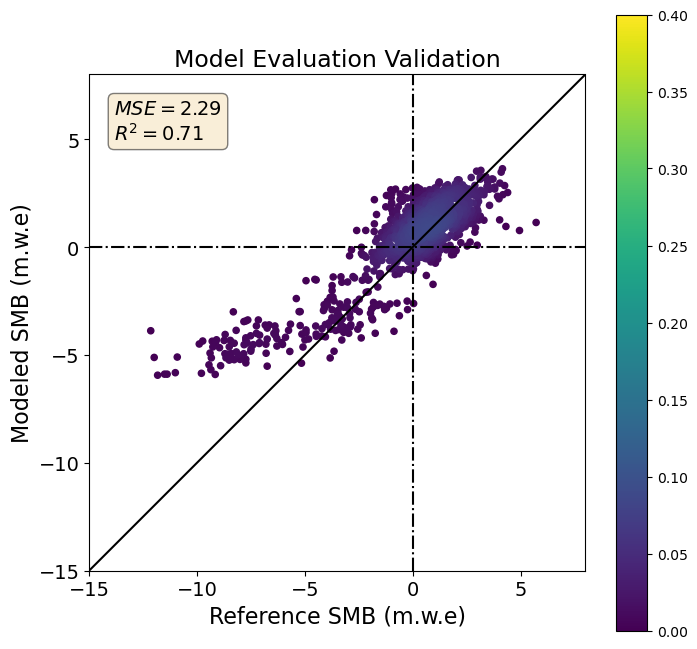

In [29]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in logo.split(X_train, y_train, groups=gp):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    xgb_model.fit(X_train1, y_train1)
    y_pred = xgb_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

In [30]:
max_features_plot = 50

xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
ind = np.argpartition(feature_importance, -max_features_plot)[-max_features_plot:]
feature_importance_50 = feature_importance[ind]
sorted_idx = np.argsort(feature_importance_50)
y_cols = np.array(df_train_X_clean.columns)[ind]


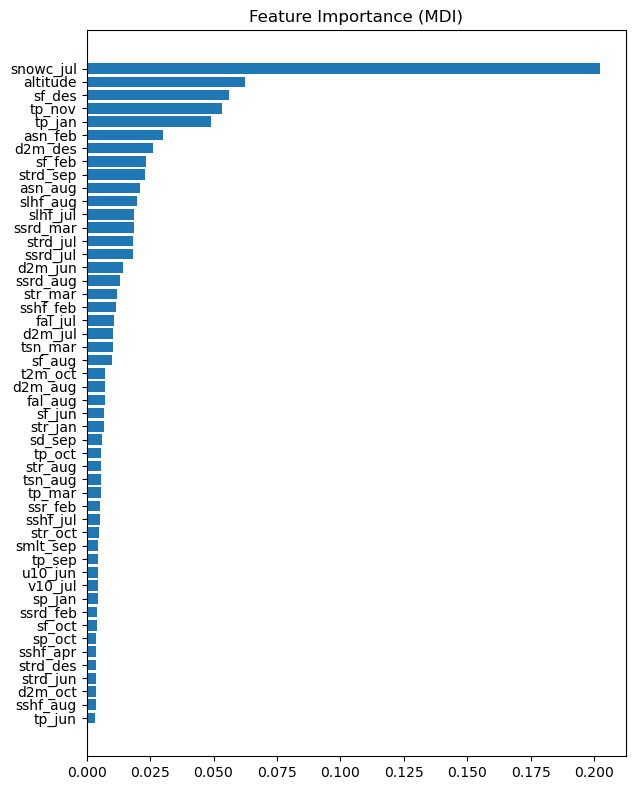

In [31]:
from sklearn.inspection import permutation_importance



#sorted_idx = np.argsort(feature_importance)
#mask = sorted_idx < 50
#sorted_idx = sorted_idx[mask]
pos = np.arange(sorted_idx.shape[0]) + 0.5

#feature_importance
#sorted_idx = np.argsort(feature_importance)
#sorted_idx
#pos = np.arange(sorted_idx.shape[0]) + 0.5
#pos
#t = np.argwhere(sorted_idx<50)
#t
#pos = np.arange(t.shape[0])+0.5

fig = plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance_50[sorted_idx], align="center")
#plt.barh(pos, feature_importance[t],align='center')
#plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.yticks(pos, y_cols[sorted_idx])
plt.title("Feature Importance (MDI)")

#result = permutation_importance(
#    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
#)
#sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
#plt.boxplot(
#    result.importances[sorted_idx].T,
#    vert=False,
#    labels=np.array(df_train_X.columns)[sorted_idx],
#)
#plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

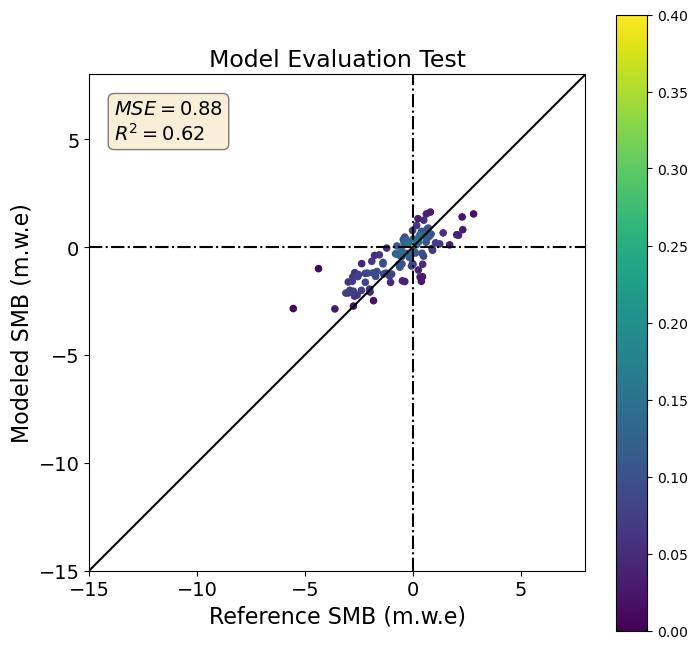

In [75]:
# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = 0.15, 
                             n_estimators = 400,
                             max_depth = 3)
# Predict on hold-out test set and plot predictions
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

### Only temp and precip, clean outliers

In [32]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneGroupOut

from plotting_functions import plot_prediction

In [33]:
# Load training and validation datasets
filepath = 'Data/'

df_train = pd.read_csv(filepath + 'train_test/data_train_all_job.csv', index_col=0)
df_test = pd.read_csv(filepath + 'train_test/data_test_job.csv', index_col=0)

In [34]:
df_train = df_train.loc[df_train['balance_netto']>-5.0]
df_test = df_test.loc[df_test['balance_netto']>-5.0]

base_cols = ['BREID','altitude','aspect','slope','slope_factor','altitude_climate']
temp_cols = ['t2m_oct','t2m_nov','t2m_des','t2m_jan','t2m_feb','t2m_mar','t2m_apr','t2m_may','t2m_jun','t2m_jul','t2m_aug','t2m_sep']
prec_cols = ['tp_oct','tp_nov','tp_des','tp_jan','tp_feb','tp_mar','tp_apr','tp_may','tp_jun','tp_jul','tp_aug','tp_sep']

cols = [y for x in [base_cols, temp_cols, prec_cols] for y in x]

df_train_X = df_train[cols]
df_train_y = df_train[['BREID','balance_netto']]
df_test_X = df_test[cols]
df_test_y = df_test[['BREID','balance_netto']]


In [35]:
# df_test_X and df_test_y now only contain BREID 2478

df_test_X = df_test_X.drop('BREID', axis=1)
df_test_y = df_test_y.drop('BREID', axis=1)

X_test, y_test = df_test_X.values, df_test_y.values

In [36]:
df_train_X_clean = df_train_X.drop('BREID', axis=1)
df_train_y_clean = df_train_y.drop('BREID', axis=1)

X_train, y_train = df_train_X_clean.values, df_train_y_clean.values

In [37]:
# Split training dataset according to glacier id (3 folds with leave one glacier out)
gp = df_train_X.BREID.values
logo = LeaveOneGroupOut()
#cv=logo.split(X_train, y_train, groups=gp)

In [38]:
xgb_model = xgb.XGBRegressor()

# Define parameter ranges.
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
          'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400], # number of trees (too many = overfitting, too few = underfitting)
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf = GridSearchCV(xgb_model, 
                   params, 
                   cv=logo.split(X_train, y_train, groups=gp), # Int or iterator
                   verbose=1, # Controls number of messages
                   n_jobs=4, # No of parallell jobs
                   scoring='neg_mean_squared_error', # Can use multiple metrics
                   refit=True, # Default True. For multiple metric evaluation, refit must be str denoting scorer to be used to find the best parameters for refitting the estimator.
                   return_train_score=False) # Default False. If False, cv_results_ will not include training scores.

# Fit model to folds
clf.fit(X_train, y_train)

# Get results of grid search
results = clf.cv_results_
print('Cross validation test score: ', clf.best_score_)
print('Cross validation test score: ', results['mean_test_score'].max())
#print('Cross validation train score: ', results['mean_train_score'].max())
print('Grid search best hyperparameters: ', clf.best_params_)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits
Cross validation test score:  -1.2749428227348016
Cross validation test score:  -1.2749428227348016
Grid search best hyperparameters:  {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 350}


In [39]:
# Get best hyperparameters from grid search.
params_best = clf.best_params_

# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                             n_estimators = params_best['n_estimators'],
                             max_depth = params_best['max_depth'])

In [40]:
from sklearn.model_selection import cross_val_score

cvl = cross_val_score(xgb_model, X_train, y_train, cv=logo.split(X_train, y_train, groups=gp), scoring='neg_mean_squared_error')

print('Cross validation scores: ', cvl)
print('Mean score: ', cvl.mean())
print('Standard deviation: ', cvl.std())

Cross validation scores:  [-1.39701819 -1.37335849 -1.05445178]
Mean score:  -1.2749428227348016
Standard deviation:  0.1562096252627325


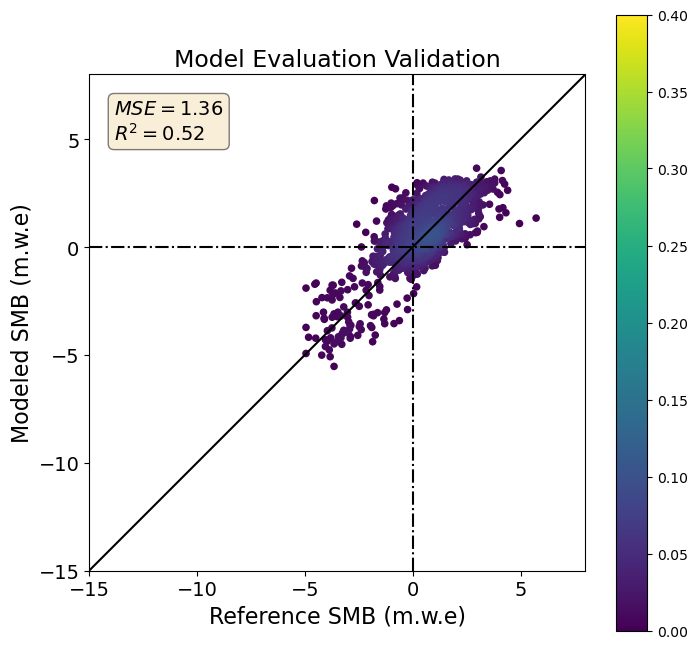

In [41]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in logo.split(X_train, y_train, groups=gp):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    xgb_model.fit(X_train1, y_train1)
    y_pred = xgb_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

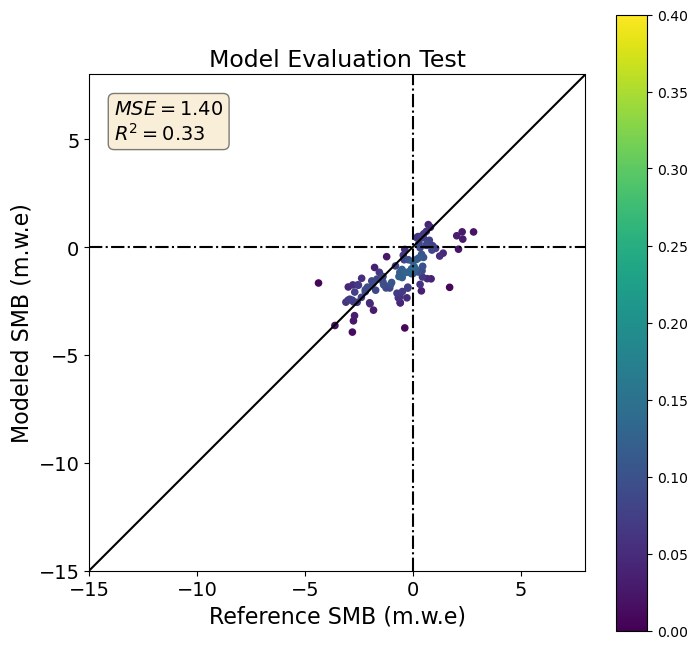

In [42]:
# Predict on hold-out test set and plot predictions
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

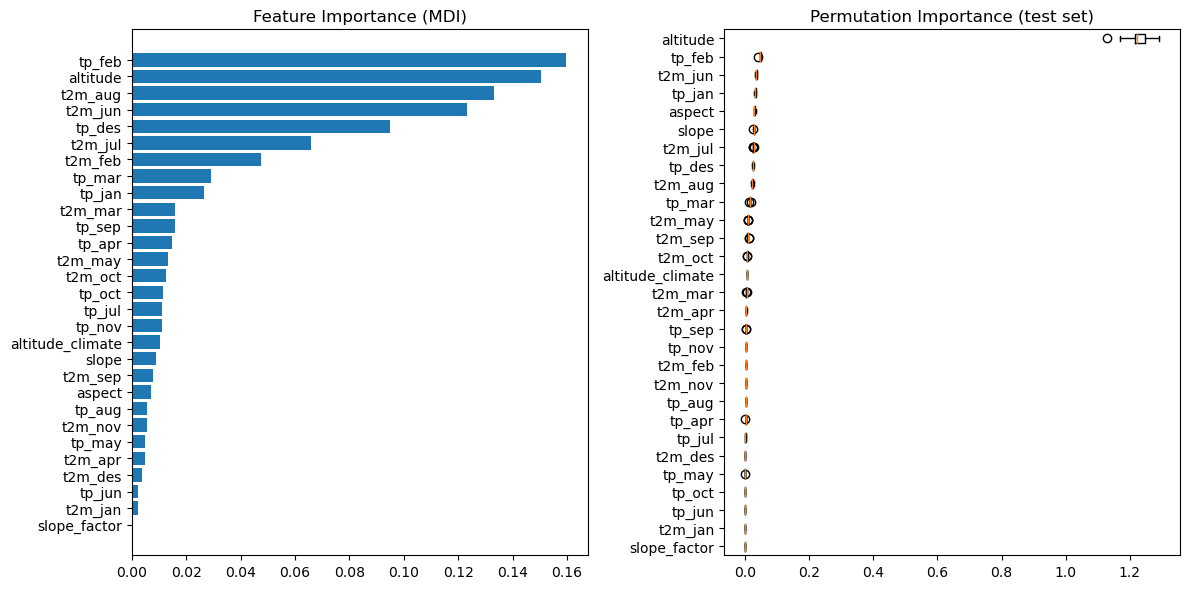

In [43]:
from sklearn.inspection import permutation_importance

xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X_clean.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X_clean.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### All climate features, clean outliers

In [44]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneGroupOut

from plotting_functions import plot_prediction

In [45]:
# Load training and validation datasets
filepath = 'Data/'

df_train = pd.read_csv(filepath + 'train_test/data_train_all_job.csv', index_col=0)
df_test = pd.read_csv(filepath + 'train_test/data_test_job.csv', index_col=0)

In [46]:
# Select columns to drop

df_train = df_train.loc[df_train['balance_netto']>-5.0]
df_test = df_test.loc[df_test['balance_netto']>-5.0]

cols = ['RGIID','GLIMSID','utm_zone','utm_east_approx','utm_north_approx','altitude_approx',
        'location_description','location_id','stake_no','utm_east','utm_north',
        'balance_winter','balance_summer','dt_prev_year_min_date','dt_curr_year_max_date',
        'dt_curr_year_min_date','stake_remark','flag_correction','approx_loc','approx_altitude',
        'diff_north','diff_east','diff_altitude','diff_netto','lat','lon','lat_approx','lon_approx',
        'topo','dis_from_border']

snow_depth_m = ['sde_oct','sde_nov','sde_des','sde_jan','sde_feb','sde_mar','sde_apr','sde_may','sde_jun','sde_jul','sde_aug','sde_sep']
snow_density = ['rsn_oct','rsn_nov','rsn_des','rsn_jan','rsn_feb','rsn_mar','rsn_apr','rsn_may','rsn_jun','rsn_jul','rsn_aug','rsn_sep']
evaporation = ['es_oct','es_nov','es_des','es_jan','es_feb','es_mar','es_apr','es_may','es_jun','es_jul','es_aug','es_sep']

drop_cols = [y for x in [cols, snow_depth_m, snow_density, evaporation] for y in x]

df_train_X = df_train.drop(drop_cols, axis=1)
df_train_y = df_train[['BREID','balance_netto']]

df_test_X = df_test.drop(drop_cols, axis=1)
df_test_y = df_test[['BREID','balance_netto']]

In [47]:
#df_test_X.columns.to_list()

In [48]:
df_test_X = df_test_X.drop(['BREID','balance_netto'], axis=1)
df_test_y = df_test_y.drop('BREID', axis=1)

X_test, y_test = df_test_X.values, df_test_y.values

In [49]:
df_train_X_clean = df_train_X.drop(['BREID','balance_netto'], axis=1)
df_train_y_clean = df_train_y.drop('BREID', axis=1)

X_train, y_train = df_train_X_clean.values, df_train_y_clean.values

In [50]:
# Split training dataset according to glacier id (3 folds with leave one glacier out)
gp = df_train_X.BREID.values
logo = LeaveOneGroupOut()
#cv=logo.split(X_train, y_train, groups=gp)

In [51]:
xgb_model = xgb.XGBRegressor()

# Define parameter ranges.
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
          'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400], # number of trees (too many = overfitting, too few = underfitting)
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf = GridSearchCV(xgb_model, 
                   params, 
                   cv=logo.split(X_train, y_train, groups=gp), # Int or iterator
                   verbose=1, # Controls number of messages
                   n_jobs=4, # No of parallell jobs
                   scoring='neg_mean_squared_error', # Can use multiple metrics
                   refit=True, # Default True. For multiple metric evaluation, refit must be str denoting scorer to be used to find the best parameters for refitting the estimator.
                   return_train_score=False) # Default False. If False, cv_results_ will not include training scores.

# Fit model to folds
clf.fit(X_train, y_train)

# Get results of grid search
results = clf.cv_results_
print('Cross validation test score: ', clf.best_score_)
print('Cross validation test score: ', results['mean_test_score'].max())
#print('Cross validation train score: ', results['mean_train_score'].max())
print('Grid search best hyperparameters: ', clf.best_params_)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits
Cross validation test score:  -1.4708959257311365
Cross validation test score:  -1.4708959257311365
Grid search best hyperparameters:  {'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 250}


In [52]:
# Get best hyperparameters from grid search.
params_best = clf.best_params_

# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                             n_estimators = params_best['n_estimators'],
                             max_depth = params_best['max_depth'])

In [53]:
from sklearn.model_selection import cross_val_score

cvl = cross_val_score(xgb_model, X_train, y_train, cv=logo.split(X_train, y_train, groups=gp), scoring='neg_mean_squared_error')

print('Cross validation scores: ', cvl)
print('Mean score: ', cvl.mean())
print('Standard deviation: ', cvl.std())

Cross validation scores:  [-1.42242017 -1.00266995 -1.98759767]
Mean score:  -1.4708959257311365
Standard deviation:  0.4035534472786705


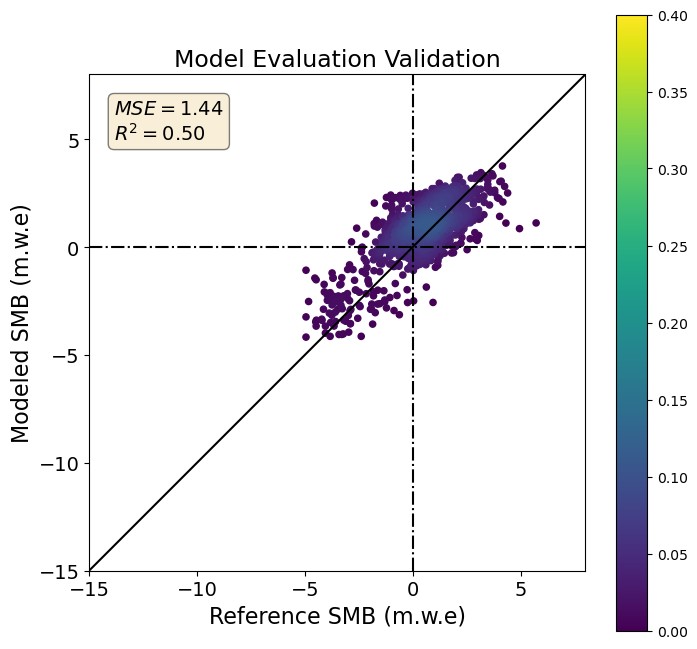

In [54]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in logo.split(X_train, y_train, groups=gp):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    xgb_model.fit(X_train1, y_train1)
    y_pred = xgb_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

In [55]:
max_features_plot = 50

xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
ind = np.argpartition(feature_importance, -max_features_plot)[-max_features_plot:]
feature_importance_50 = feature_importance[ind]
sorted_idx = np.argsort(feature_importance_50)
y_cols = np.array(df_train_X_clean.columns)[ind]


In [56]:
df_train_X_clean.columns[np.argmax(feature_importance)]

'snowc_jul'

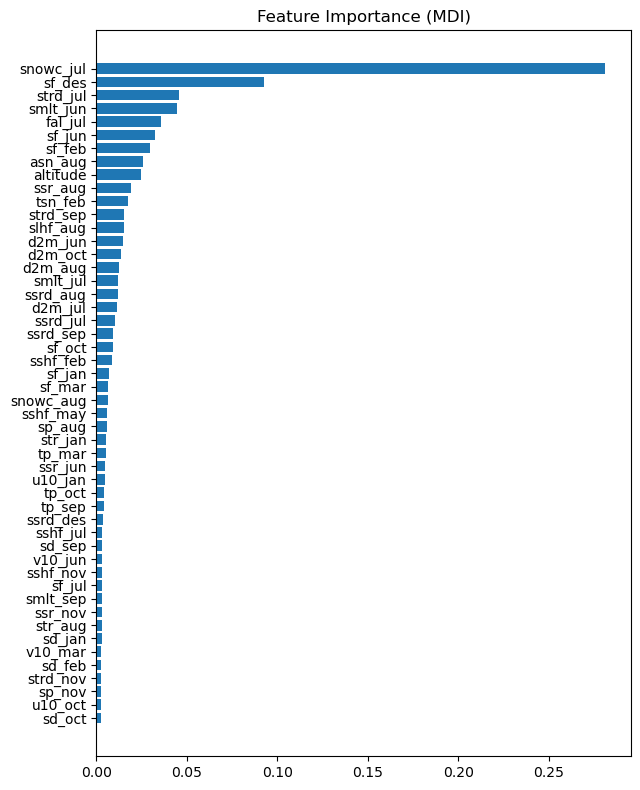

In [57]:
from sklearn.inspection import permutation_importance

#sorted_idx = np.argsort(feature_importance)
#mask = sorted_idx < 50
#sorted_idx = sorted_idx[mask]
pos = np.arange(sorted_idx.shape[0]) + 0.5

#feature_importance
#sorted_idx = np.argsort(feature_importance)
#sorted_idx
#pos = np.arange(sorted_idx.shape[0]) + 0.5
#pos
#t = np.argwhere(sorted_idx<50)
#t
#pos = np.arange(t.shape[0])+0.5

fig = plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance_50[sorted_idx], align="center")
#plt.barh(pos, feature_importance[t],align='center')
#plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.yticks(pos, y_cols[sorted_idx])
plt.title("Feature Importance (MDI)")

#result = permutation_importance(
#    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
#)
#sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
#plt.boxplot(
#    result.importances[sorted_idx].T,
#    vert=False,
#    labels=np.array(df_train_X.columns)[sorted_idx],
#)
#plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

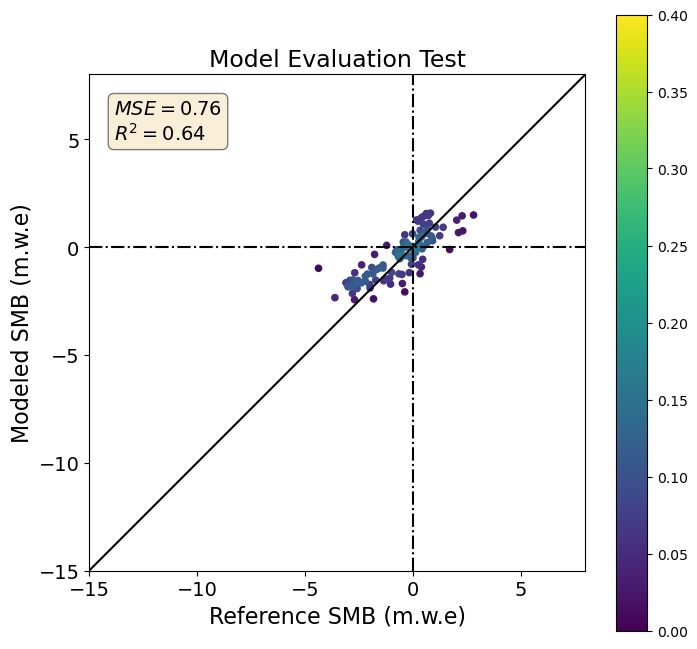

In [58]:
# Predict on hold-out test set and plot predictions
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

## Model training with k-fold (random split) cross-validation for JOB glaciers
Model training witk-foldut cross-validati (random)on fo4 JOB glaciers.t.

In [38]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneGroupOut

from model_functions import select_variables
from plotting_functions import plot_prediction

In [39]:
# Load training and validation datasets
filepath = 'Data/'

df_train = pd.read_csv(filepath + 'train_test/data_train_all_job_rdsplit.csv', index_col=0)
df_test = pd.read_csv(filepath + 'train_test/data_test_job_rdsplit.csv', index_col=0)

In [40]:
# Make year column
df_train['year']=pd.to_datetime(df_train['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
df_train['year'] = df_train.year.dt.year.astype('Int64')

df_test['year']=pd.to_datetime(df_test['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
df_test['year'] = df_test.year.dt.year.astype('Int64')

In [45]:
base_cols = ['altitude','aspect','slope','slope_factor','altitude_climate']
temp_cols = ['t2m_oct','t2m_nov','t2m_des','t2m_jan','t2m_feb','t2m_mar','t2m_apr','t2m_may','t2m_jun','t2m_jul','t2m_aug','t2m_sep']
prec_cols = ['tp_oct','tp_nov','tp_des','tp_jan','tp_feb','tp_mar','tp_apr','tp_may','tp_jun','tp_jul','tp_aug','tp_sep']
label_cols = ['balance_netto']

df_train_X = select_variables(df_train, base_cols, temp_cols, prec_cols)
df_train_y = select_variables(df_train, label_cols)
df_test_X = select_variables(df_test, base_cols, temp_cols, prec_cols)
df_test_y = select_variables(df_test, label_cols)


In [46]:
X_test, y_test = df_test_X.values, df_test_y.values
X_train, y_train = df_train_X_clean.values, df_train_y_clean.values

In [19]:
# Create Kfold iterator for given number of splits
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=5) # size of the test set will be 1/K (i.e. 1/n_splits); 1/5 = 0.2, 1/10 = 0.1
#kf
#idcs = kf.split(X_train, y_train)


In [20]:
xgb_model = xgb.XGBRegressor()

# Define parameter ranges.
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
          'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400], # number of trees (too many = overfitting, too few = underfitting)
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf = GridSearchCV(xgb_model, 
                   params, 
                   cv=kf, # Int or iterator
                   verbose=1, # Controls number of messages
                   n_jobs=4, # No of parallell jobs
                   scoring='neg_mean_squared_error', # Can use multiple metrics
                   refit=True, # Default True. For multiple metric evaluation, refit must be str denoting scorer to be used to find the best parameters for refitting the estimator.
                   return_train_score=False) # Default False. If False, cv_results_ will not include training scores.

# Fit model to folds
clf.fit(X_train, y_train)

# Get results of grid search
results = clf.cv_results_
print('Cross validation test score: ', clf.best_score_)
print('Cross validation test score: ', results['mean_test_score'].max())
#print('Cross validation train score: ', results['mean_train_score'].max())
print('Grid search best hyperparameters: ', clf.best_params_)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
Cross validation test score:  -0.423374766711472
Cross validation test score:  -0.423374766711472
Grid search best hyperparameters:  {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 400}


In [22]:
# Get best hyperparameters from grid search.
params_best = clf.best_params_

# Define model object with best hyperparameters.
xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                             n_estimators = params_best['n_estimators'],
                             max_depth = params_best['max_depth'])



In [24]:
from sklearn.model_selection import cross_val_score

cvl = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

print('Cross validation scores: ', cvl)
print('Mean score: ', cvl.mean())
print('Standard deviation: ', cvl.std())

Cross validation scores:  [-0.4868543  -0.53826303 -0.34814573 -0.35529413 -0.38831664]
Mean score:  -0.423374766711472
Standard deviation:  0.07583194139744977


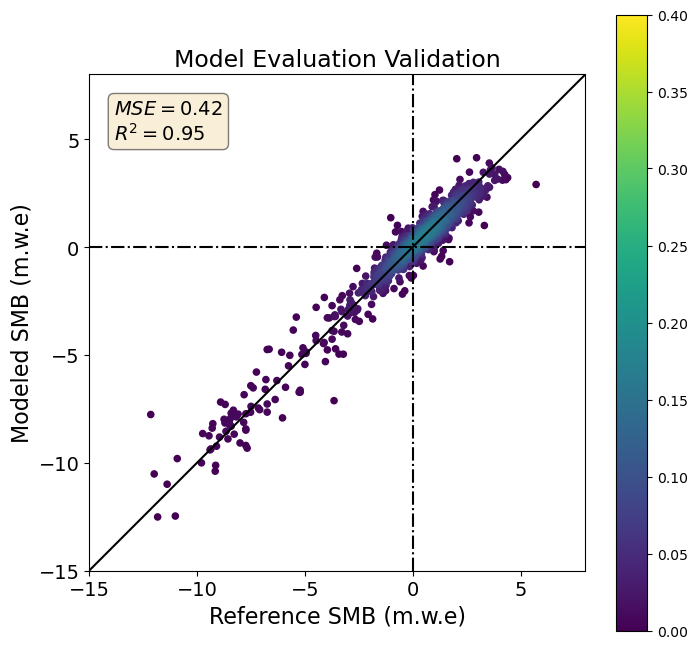

In [34]:
# Plot validation scores for each of the k folds together.

y_test_list = []
y_pred_list = []

for train_index, test_index in kf.split(X_train, y_train):
    # Loops over n_splits iterations and gets train and test splits in each fold
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    xgb_model.fit(X_train1, y_train1)
    y_pred = xgb_model.predict(X_test1)

    y_test_list.extend(y_test1)
    y_pred_list.extend(y_pred)

# Arrays of predictions and observations for each fold
y_test_all = np.hstack([*y_test_list])
y_pred_all = np.hstack([*y_pred_list])

# Plot predictions and observations for each cross-valiadation fold together
plot_prediction(y_test_all, y_pred_all, 'Validation', n_toplot=5000)

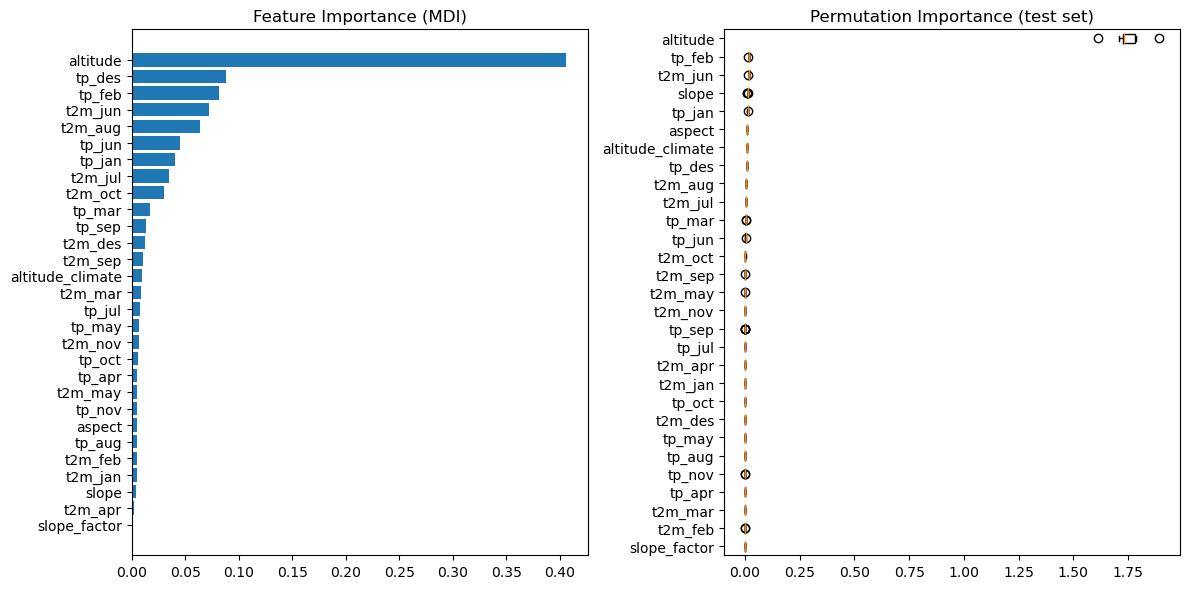

In [28]:
from sklearn.inspection import permutation_importance

xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X_clean.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X_clean.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

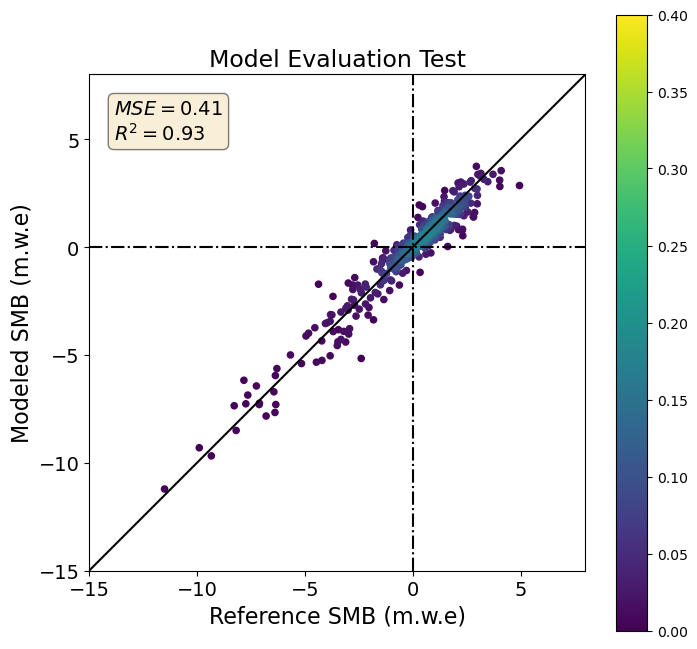

In [29]:
# Define model object with best hyperparameters.
#xgb_model = xgb.XGBRegressor(learning_rate = 0.05, 
#                             n_estimators = 400,
#                             max_depth = 3)

# Predict on hold-out test set and plot predictions
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)

plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

## Model training with k-fold (random split) cross-validation for JOB glaciers - all climate data
Model training with k-fold cross-validation (random) for 4 JOB glaciers.
